In [1]:
# Loaded variable 'df' from URI: /Users/adamsorrenti/Documents/GitHub/lock-pred/data/fixed/row_locks.csv
import pandas as pd
import numpy as np
df = pd.read_csv(r'/Users/adamsorrenti/Documents/GitHub/lock-pred/data/fixed/table_locks.csv')

In [2]:
def convert_to_iso(timestamp):
    """Converts timestamp format to ISO 8601."""
    parts = timestamp.split("-")  # Split by '-'
    date_part = "-".join(parts[:3])  # Keep first three elements as YYYY-MM-DD
    time_part = parts[3].replace(".", ":", 2)  # Replace only first two dots in the time part
    return f"{date_part}T{time_part}" # Make sure this is UTC!

In [3]:
convert_to_iso("2024-12-17-13.28.04.000003001")

'2024-12-17T13:28:04.000003001'

In [4]:
np.datetime64(convert_to_iso("2024-12-17-13.28.04.000003001"), 'ns').astype('int')

1734442084000003001

In [5]:
pd.to_datetime(1734442084000003001, unit='ns').isoformat()

'2024-12-17T13:28:04.000003001'

In [6]:
data=df

In [7]:
data["Start Timestamp ISO8601"] = data["Start Timestamp"].apply(convert_to_iso)
data["End Timestamp ISO8601"] = data["End Timestamp"].apply(convert_to_iso)
data["Start Unix Timestamp"] = data["Start Timestamp ISO8601"].apply(
    lambda x: np.datetime64(x, 'ns').astype('int')
)
data["End Unix Timestamp"] = data["End Timestamp ISO8601"].apply(
    lambda x: np.datetime64(x, 'ns').astype('int')
)

In [8]:
data

,Original Lockname,Lockname,Start Timestamp,End Timestamp,Start_Duration,End_Duration,curIntent,intent,mode,LOCK_OBJECT_TYPE,TBSP_NAME,TABSCHEMA,TABNAME,Start Timestamp ISO8601,End Timestamp ISO8601,Start Unix Timestamp,End Unix Timestamp
0,00000500000000000000000054,00000500000000000000000054_1,2024-12-17-13.28.04.000003000,2024-12-17-13.28.04.000007000,0.000937,0.004245,NON,.IS,.IS,TABLE ...,SYSCATSPACE ...,SYSIBM ...,SYSTABLES ...,2024-12-17T13:28:04.000003000,2024-12-17T13:28:04.000007000,1734442084000003000,1734442084000007000
1,02000800000000000000000054,02000800000000000000000054_1,2024-12-17-13.28.04.000004000,2024-12-17-13.28.04.000004000,0.001523,0.001896,NON,.IN,.IN,TABLE ...,USERSPACE1 ...,DB2ADMIN ...,WAREHOUSE ...,2024-12-17T13:28:04.000004000,2024-12-17T13:28:04.000004000,1734442084000004000,1734442084000004000
2,02000800000000000000000054,02000800000000000000000054_2,2024-12-17-13.28.04.000006000,2024-12-17-13.28.04.000006000,0.003400,0.003416,NON,.IN,.IN,TABLE ...,USERSPACE1 ...,DB2ADMIN ...,WAREHOUSE ...,2024-12-17T13:28:04.000006000,2024-12-17T13:28:04.000006000,1734442084000006000,1734442084000006000
3,02000800000000000000000054,02000800000000000000000054_3,2024-12-17-13.28.04.000006000,2024-12-17-13.28.04.000006000,0.003420,0.003422,NON,.IN,.IN,TABLE ...,USERSPACE1 ...,DB2ADMIN ...,WAREHOUSE ...,2024-12-17T13:28:04.000006000,2024-12-17T13:28:04.000006000,1734442084000006000,1734442084000006000
4,02000800000000000000000054,02000800000000000000000054_4,2024-12-17-13.28.04.000007000,2024-12-17-13.28.04.000008000,0.004316,0.005922,NON,.IS,.IS,TABLE ...,USERSPACE1 ...,DB2ADMIN ...,WAREHOUSE ...,2024-12-17T13:28:04.000007000,2024-12-17T13:28:04.000008000,1734442084000007000,1734442084000008000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178907,00001100000000000000000054,00001100000000000000000054_106,2024-12-17-13.26.19.000638000,2024-12-17-13.26.19.000638000,1184.126395,1184.126407,NON,.IS,.IS,TABLE ...,SYSCATSPACE ...,SYSIBM ...,SYSDBAUTH ...,2024-12-17T13:26:19.000638000,2024-12-17T13:26:19.000638000,1734441979000638000,1734441979000638000
2178908,00001100000000000000000054,00001100000000000000000054_107,2024-12-17-13.26.19.000638000,2024-12-17-13.26.19.000639000,1184.126411,1184.126420,NON,.IS,.IS,TABLE ...,SYSCATSPACE ...,SYSIBM ...,SYSDBAUTH ...,2024-12-17T13:26:19.000638000,2024-12-17T13:26:19.000639000,1734441979000638000,1734441979000639000
2178909,00001100000000000000000054,00001100000000000000000054_108,2024-12-17-13.26.19.000639000,2024-12-17-13.26.19.000639000,1184.126423,1184.126427,NON,.IS,.IS,TABLE ...,SYSCATSPACE ...,SYSIBM ...,SYSDBAUTH ...,2024-12-17T13:26:19.000639000,2024-12-17T13:26:19.000639000,1734441979000639000,1734441979000639000
2178910,00000500000000000000000054,00000500000000000000000054_30,2024-12-17-13.26.19.000640000,2024-12-17-13.26.19.000641000,1184.128367,1184.129377,NON,.IS,.IS,TABLE ...,SYSCATSPACE ...,SYSIBM ...,SYSTABLES ...,2024-12-17T13:26:19.000640000,2024-12-17T13:26:19.000641000,1734441979000640000,1734441979000641000


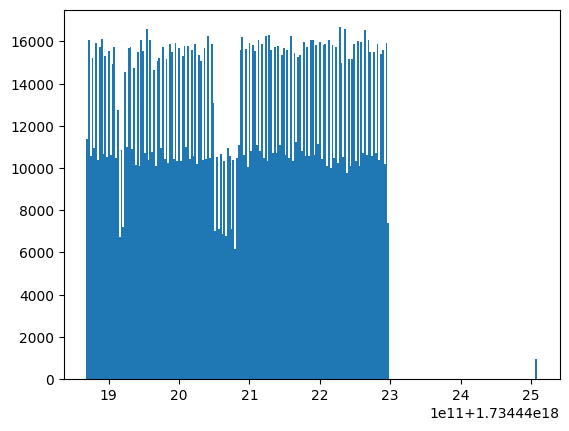

In [9]:
import matplotlib.pyplot as plt
all_times = data["Start Unix Timestamp"].sort_values(ascending=True)
test_times = data["Start Unix Timestamp"].sort_values(ascending=True).iloc[int(len(data) * 0.7):]
plt.hist(all_times, bins=250)
plt.show()

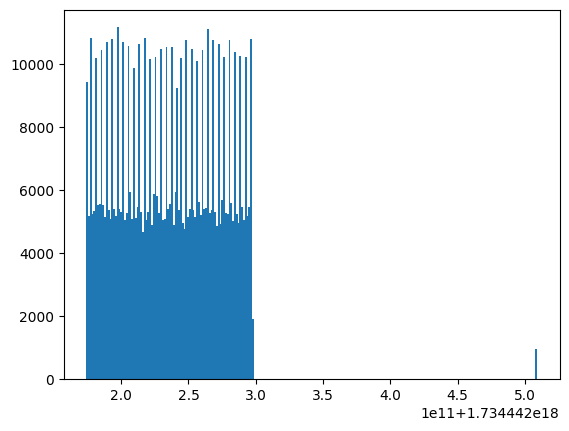

In [10]:
plt.hist(test_times, bins=250)
plt.show()

In [11]:
data["Start Unix Timestamp"].iloc[-5:]

2178907    1734441979000638000
2178908    1734441979000638000
2178909    1734441979000639000
2178910    1734441979000640000
2178911    1734441979000642000
Name: Start Unix Timestamp, dtype: int64

In [12]:
data["Start Unix Timestamp"].max()

1734442509000033000

In [13]:
1734442509000033000 > 1734441979000642000

True

In [14]:
pd.to_datetime(1734441979000642000, unit='ns').isoformat()

'2024-12-17T13:26:19.000642'

In [15]:
pd.to_datetime(1734442509000033000, unit='ns').isoformat()

'2024-12-17T13:35:09.000033'

In [16]:
diffs = (data["End Unix Timestamp"]-data["Start Unix Timestamp"])

In [17]:
bool_diff = diffs<0

In [18]:
# get index of the first 1 in bool_diff
index = bool_diff.idxmax()

In [19]:
bool_diff.sum()

12

In [20]:
data.iloc[index]

Original Lockname                                 02000500000000000000000054
Lockname                                    02000500000000000000000054_47046
Start Timestamp                                2024-12-17-13.35.09.000030000
End Timestamp                                  2024-12-17-13.27.59.000538000
Start_Duration                                                    425.027721
End_Duration                                                      425.032098
curIntent                                                                NON
intent                                                                   .IX
mode                                                                     .IX
LOCK_OBJECT_TYPE           TABLE                                         ...
TBSP_NAME                  USERSPACE1                                    ...
TABSCHEMA                  DB2ADMIN                                      ...
TABNAME                    DISTRICT                                      ...

In [21]:
lock_name_counts = data['Original Lockname'].value_counts()

In [22]:
lock_name_counts

Original Lockname
02000700000000000000000054    659788
00000F00000000000000000054    295412
00001000000000000000000054    295412
02000400000000000000000054    241081
02000500000000000000000054    137644
02000800000000000000000054    131204
02000C00000000000000000054     84087
02000B00000000000000000054     78962
02000A00000000000000000054     72353
02000900000000000000000054     72346
02000600000000000000000054     65289
00000D00000000000000000054     22602
00000001000000000000000054     11260
00000601000000000000000054     11228
00001100000000000000000054       108
00000F04000000000000000054        50
00000500000000000000000054        29
00000700000000000000000054        23
00000C03000000000000000054         9
00000600000000000000000054         5
00001703000000000000000054         4
00001803000000000000000054         4
00000D01000000000000000054         4
03000600000000000000000054         4
03000400000000000000000054         2
00000801000000000000000054         1
00000A00000000000000